In [3]:
%matplotlib inline
from pylab import *

import detectorgeometry as geom
reload(geom)

import detectorgeometry_trap as geom_trap
reload(geom_trap)

import detectorgeometry_071719 as geom_new
reload(geom_new)

<module 'detectorgeometry_071719' from 'detectorgeometry_071719.pyc'>

In [2]:
h = 35.5 #km
R = 6356. # km
theta_view = radians(1) #degrees
N = 5000000 # number of samples

theta_src = radians(0)
area = geom_trap.Area(theta_src,h,R,theta_view, N)
A_deg, e_phi, e_theta, view_angle, exit_angle, emg_angle, norm, e_dot, A0, N0= area.event_retention()
# earth_t_min, earth_t_max, phi_E_min, phi_E_max = area.earth_patch(area.t_src,area.phi_src, area.th_v)
# r_x, r_y, r_z = area.coords(area.t_src, area.phi_src + np.pi) 
# t_e,phi_e = area.earth_locs(earth_t_min, earth_t_max, phi_E_min, phi_E_max)
# e_x,e_y,e_z = area.coords(t_e,phi_e)
# dot = area.dot_prod(e_x,e_y,e_z,r_x, r_y,r_z)
# view_angle,exit_angle, flight_path = area.view_angle_dist_det(e_x,e_y,e_z,r_x, r_y,r_z)


detectorgeometry_trap.py:54: RuntimeWarning: invalid value encountered in double_scalars
  arg2 = (self.h * np.tan(theta_src)) /(4*np.pi*np.sin(earth_t)*self.R)


In [ ]:
#print A, e_phi, view_angle
fig = plt.figure(figsize=(5.5,3.5))

plt.scatter(degrees(e_phi)-180, degrees(e_theta),s=1)
plt.axvline(degrees(min(e_phi))-180)
plt.axvline(degrees(max(e_phi))-180)
plt.xlabel("Earth phi "+r'($^{\circ}$)')

# plt.scatter(radians(degrees(e_phi)-180), degrees(e_theta),s=1)
# plt.axvline(radians(degrees(min(e_phi))-180))
# plt.axvline(radians(degrees(max(e_phi))-180))
# plt.xlabel("Earth phi (radians)")

plt.ylabel("Earth theta "+r'($^{\circ}$)')
plt.axhline(degrees(min(e_theta)))
plt.axhline(degrees(max(e_theta)))

print radians(max(degrees(e_phi))-min(degrees(e_phi)))
print radians(max(degrees(np.unwrap(e_theta)))-min(degrees(np.unwrap(e_theta))))
            

# plt.scatter(e_phi, e_theta,s=1)
# plt.xlabel("Earth phi (rad)")
# plt.ylabel("Earth theta (rad)")
# plt.axhline(min(e_theta))
# plt.axhline(max(e_theta))
# plt.axvline(min(e_phi))
# plt.axvline(max(e_phi))

plt.title(str(round(degrees(theta_src),1))+r'$^{\circ}$'+" Source Zenith Angle")
#plt.ylim(0.8*min(degrees(samp_t_e) ),1.2*max(degrees(samp_t_e) ))

plt.show()



In [ ]:
area2 = geom_trap.Area(radians(1),h,R,theta_view, N)
print degrees(area2.thetaE_nadir(radians(1)))
print (2*pi*R**2)*(1-np.cos(area2.thetaE_nadir(radians(1))))

In [4]:
h = 35.5 #km
R = 6356. # km
theta_view = radians(1) #degrees
N = 10000000 # number of samples

areas1=[]
areas2=[]

# start = 0 # minimum source declination in degrees
# end = 80 # maximum source declination in degrees
# steps=80 # divisions indeclination used to generate plot
# x1 = np.linspace(-(90-start),-(90-end),steps)
# for j in range(0,steps):
#     theta = radians(start+(end-start)*float(j)/steps)
    
#     area1 = geom.Area(theta,h,R,theta_view, N)
#     A1 = area1.degree_eff_area()
    
#     area2 = geom_trap.Area(theta,h,R,theta_view, N)
#     A2, phi_e, theta_e, view_angle, exit_angle, emg_angle, norm, e_dot, A0, N0= area2.event_retention()
 
#     areas1.append(A1)
#     areas2.append(A2)
#     print degrees(theta),A1, A2
#     print "   "


    
start = 0 # minimum source declination in degrees
end = 90 # maximum source declination in degrees
steps=180 # divisions indeclination used to generate plot
x2 = np.linspace(-(90-start),-(90-end),steps)
for j in range(0,steps):
    theta = radians(start+(end-start)*float(j)/steps)
    
    area1 = geom.Area(theta,h,R,theta_view, N)
    A1 = area1.degree_eff_area()
    
    area2 = geom_trap.Area(theta,h,R,theta_view, N)
    A2, phi_e, theta_e, view_angle, exit_angle, emg_angle, norm, e_dot, A0, N0= area2.event_retention()
 
    areas1.append(A1)
    areas2.append(A2)
    print degrees(theta),A1, A2
    print "   "


detectorgeometry_trap.py:54: RuntimeWarning: invalid value encountered in double_scalars
  arg2 = (self.h * np.tan(theta_src)) /(4*np.pi*np.sin(earth_t)*self.R)


0.0 1.1278807680955045 1.2056015820022725
   
0.5 1.268817084759876 1.2059145363419053
   
1.0 0.845780327603741 1.2049770950452656
   
1.5000000000000002 0.8456175450245601 1.243127964782642
   
2.0 1.2680839989220496 1.2068504206588
   
2.5 1.2676455165009268 1.2096977737840722
   
3.0000000000000004 1.2671057328617765 1.210482562471183
   
3.5 1.26647268765136 1.2098410204084435
   
4.0 1.2657418598766443 1.2114026986823694
   
4.5 1.546002063091045 1.2139839439203584
   
5.0 1.1235416030495506 1.2184301600726348
   
5.5 1.2629567489589766 1.2198414098577146
   
6.000000000000001 1.6824495867832394 1.2181542485226367
   
6.5 1.1205491356489286 1.2229230963835973
   
7.0 1.8189927311827543 1.2222873408263708
   
7.499999999999999 1.6771881273004097 1.22322844173724
   
8.0 0.837585471813082 1.2298384380255634
   
8.5 1.1153542835063999 1.2350110454735996
   
9.0 0.9746076142939363 1.2340422149043548
   
9.5 1.112238367352558 1.2367204375327163
   
10.0 1.2493682623767273 1.2430988290

detectorgeometry_trap.py:35: RuntimeWarning: invalid value encountered in arcsin
  arg = np.arcsin((self.R+self.h) * np.sin(nadir) / self.R)


84.0 88.6551464951484 87.87912327914626
   
84.5 19.31984135758983 19.313496568519806
   
85.0 0.0 0.0
   
85.5 0.0 0.0
   
86.0 0.0 0.0
   
86.5 0.0 0.0
   
87.0 0.0 0.0
   
87.5 0.0 0.0
   
88.0 0.0 0.0
   
88.5 0.0 0.0
   
89.0 0.0 0.0
   
89.5 0.0 0.0
   


[]

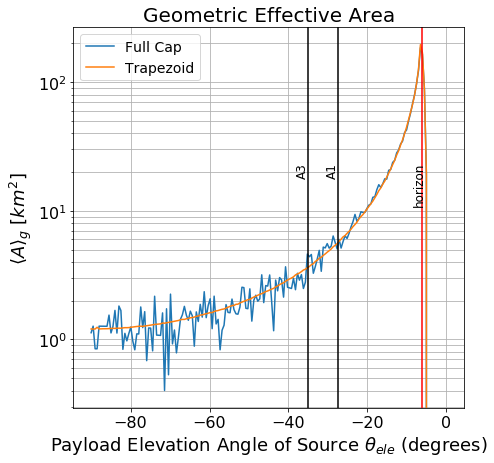

In [5]:
# Creating a plot for the full range of possible source declinations 
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
x_full = x2 #np.concatenate((x1,x2))

ax.plot(x_full, areas1)
ax.plot(x_full, areas2)
    
horizon = degrees(np.arcsin(R / (R+h)))-90
plt.text(-8.5,20,'horizon',rotation=90,fontsize=12)
plt.text(-30.5,20,'A1',rotation=90,fontsize=12)
plt.text(-38,20,'A3',rotation=90,fontsize=12)
horizon = degrees(np.arcsin(R / (R+h)))-90
A1 = -27.4
A3 = -35
plt.axvline(x=horizon,color='r')
plt.axvline(x=A1,color='k')
plt.axvline(x=A3,color='k')
legend = ax.legend(["Full Cap", "Trapezoid"], fontsize=14)
plt.xlabel("Payload Elevation Angle of Source "+r'$\theta_{ele}$'+" (degrees)", fontsize=18)
plt.ylabel(r'$\langle A \rangle_g$'+" "+r'$[km^2]$', fontsize=18)
plt.title("Geometric Effective Area", fontsize=20)
plt.setp(legend.get_title(),fontsize='x-large')
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.grid(True,which='both')
plt.semilogy()